# TP: Python, Numpy, Pandas, and linear regression

In [14]:
import sys
from os import path
import urllib
import zipfile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Import data:

In [5]:
# Download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)

# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']

df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                na_values=na_values, usecols=fields)

1) Clean missing features.

Count missing features:

In [6]:
df['Global_active_power'].isna().value_counts()

False    196268
True       3732
Name: Global_active_power, dtype: int64

There are 3732 missing Global_active_power values.

In [7]:
df['Sub_metering_1'].isna().value_counts()

False    196268
True       3732
Name: Sub_metering_1, dtype: int64

There are 3732 missing Sub_metering_1 values.

Remove missing features:

In [8]:
df = df.dropna(axis=0, how='any', subset=['Global_active_power', 'Sub_metering_1'])

2) Scale the variable.

`Global_active_power` is in kW and `Sub_metering_1` in W.h:

In [9]:
df['Sub_metering_1'] = df['Sub_metering_1']*60/1000

3) Index dataframe with timestamps.

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date')

,Time,Global_active_power,Sub_metering_1
Date,,,
2006-12-16,17:24:00,4.216,0.0
2006-12-16,17:25:00,5.360,0.0
2006-12-16,17:26:00,5.374,0.0
2006-12-16,17:27:00,5.388,0.0
2006-12-16,17:28:00,3.666,0.0
2006-12-16,17:29:00,3.520,0.0
2006-12-16,17:30:00,3.702,0.0
2006-12-16,17:31:00,3.700,0.0
2006-12-16,17:32:00,3.668,0.0


4) Daily average

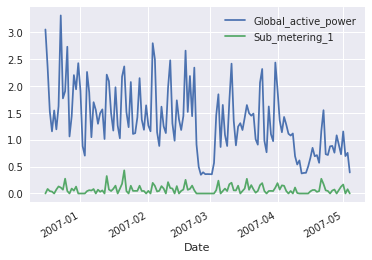

In [15]:
sns.set()
df.groupby(['Date']).mean().plot()
plt.show()

The global power and energy consumption drops to basically nil from around the 23rd February until the 3rd March. Since Sub_metering_1 represents the energy consumption in the kitchen, which does not really vary with tempeture or other environmental parameters and is essential to daily life, one of two things: either a country-wide holidays during which everybody left (which is the case as this is winter holidays week) or a massive power outage took place.  
Same in April, from the 10th to the 15th, for the spring holidays.

5) Weekdays average